In [ ]:
!pip install fbprophet

In [ ]:
import prophet

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('/content/dfVnavg_V_Hourly.csv')
df.head()

Time     Vnavg_V
0  2021-01-02 19:00:00  240.609217
1  2021-01-02 20:00:00  242.816783
2  2021-01-02 21:00:00  241.642667
3  2021-01-02 22:00:00  242.809217
4  2021-01-02 23:00:00  241.877150

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     20401 non-null  datetime64[ns]
 1   Vnavg_V  18272 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 318.9 KB


Time     Vnavg_V
0 2021-01-02 19:00:00  240.609217
1 2021-01-02 20:00:00  242.816783
2 2021-01-02 21:00:00  241.642667
3 2021-01-02 22:00:00  242.809217
4 2021-01-02 23:00:00  241.877150

In [ ]:
df = df.set_index('Time')
df

Vnavg_V
Time                           
2021-01-02 19:00:00  240.609217
2021-01-02 20:00:00  242.816783
2021-01-02 21:00:00  241.642667
2021-01-02 22:00:00  242.809217
2021-01-02 23:00:00  241.877150
...                         ...
2023-05-02 15:00:00  235.497283
2023-05-02 16:00:00  233.516883
2023-05-02 17:00:00  236.922617
2023-05-02 18:00:00  236.840750
2023-05-02 19:00:00  238.569286

[20401 rows x 1 columns]

In [ ]:
df['Vnavg_V'].fillna(value=df['Vnavg_V'].mean(), inplace=True)

In [ ]:
fig = px.line(df.reset_index(), x ='Time', y='Vnavg_V', title='Vnavg_V')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector = dict(
        buttons = list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=1, label="2y", step="year", stepmode="backward"),
            dict(count=1, label="3y", step="year", stepmode="backward"),
            dict(step='all')
        ])
    )
)
fig.show()

In [ ]:
df.isna().any()

Vnavg_V    False
dtype: bool

In [ ]:
import prophet

In [ ]:
df_Vnavg_v = df.reset_index()[['Time','Vnavg_V']].rename({'Time':'ds','Vnavg_V':'y'}, axis = 'columns')
df_Vnavg_v

ds           y
0     2021-01-02 19:00:00  240.609217
1     2021-01-02 20:00:00  242.816783
2     2021-01-02 21:00:00  241.642667
3     2021-01-02 22:00:00  242.809217
4     2021-01-02 23:00:00  241.877150
...                   ...         ...
20396 2023-05-02 15:00:00  235.497283
20397 2023-05-02 16:00:00  233.516883
20398 2023-05-02 17:00:00  236.922617
20399 2023-05-02 18:00:00  236.840750
20400 2023-05-02 19:00:00  238.569286

[20401 rows x 2 columns]

In [ ]:
train_size = int(len(df_Vnavg_v) * 0.95)
test_size = len(df_Vnavg_v) - train_size
train, test = df_Vnavg_v.iloc[0:train_size], df_Vnavg_v.iloc[train_size:len(df_Vnavg_v)]
print(train.shape, test.shape)

(19380, 2) (1021, 2)


In [ ]:
from prophet import Prophet

# Create a Prophet model with changepoint_range set to 0.95
m = Prophet(changepoint_range=0.95)


In [ ]:
train

ds           y
0     2021-01-02 19:00:00  240.609217
1     2021-01-02 20:00:00  242.816783
2     2021-01-02 21:00:00  241.642667
3     2021-01-02 22:00:00  242.809217
4     2021-01-02 23:00:00  241.877150
...                   ...         ...
19375 2023-03-21 02:00:00  236.795583
19376 2023-03-21 03:00:00  236.762467
19377 2023-03-21 04:00:00  236.948950
19378 2023-03-21 05:00:00  236.112783
19379 2023-03-21 06:00:00  239.572917

[19380 rows x 2 columns]

In [ ]:
m.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp36bew8g8/r1ut8bfq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp36bew8g8/2scnbq6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13798', 'data', 'file=/tmp/tmp36bew8g8/r1ut8bfq.json', 'init=/tmp/tmp36bew8g8/2scnbq6w.json', 'output', 'file=/tmp/tmp36bew8g8/prophet_modeleq497da8/prophet_model-20230521154346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:43:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:44:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
time_to_check = pd.to_datetime('2023-03-19 07:00:00')

if time_to_check in train['ds'].values:
    print("The time exists in the column.")
else:
    print("The time does not exist in the column.")

The time exists in the column.


In [ ]:
future = m.make_future_dataframe(periods=1021, freq='H')
len(future)

20401

In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
20396 2023-05-02 15:00:00  234.227101  227.369086  240.568069
20397 2023-05-02 16:00:00  234.679347  228.000851  241.156264
20398 2023-05-02 17:00:00  235.765849  229.185340  242.074622
20399 2023-05-02 18:00:00  237.080361  230.257851  244.090968
20400 2023-05-02 19:00:00  238.093101  231.196384  244.250718

In [ ]:
# forecast

In [ ]:
df_Vnavg_v

ds           y
0     2021-01-02 19:00:00  240.609217
1     2021-01-02 20:00:00  242.816783
2     2021-01-02 21:00:00  241.642667
3     2021-01-02 22:00:00  242.809217
4     2021-01-02 23:00:00  241.877150
...                   ...         ...
20396 2023-05-02 15:00:00  235.497283
20397 2023-05-02 16:00:00  233.516883
20398 2023-05-02 17:00:00  236.922617
20399 2023-05-02 18:00:00  236.840750
20400 2023-05-02 19:00:00  238.569286

[20401 rows x 2 columns]

In [ ]:
results = pd.concat([df_Vnavg_v.set_index('ds')['y'],forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)

In [ ]:
results

y        yhat  yhat_lower  yhat_upper
ds                                                                 
2021-01-02 19:00:00  240.609217  243.150117  237.503930  249.021678
2021-01-02 20:00:00  242.816783  243.731181  238.028244  249.152530
2021-01-02 21:00:00  241.642667  243.792493  238.284319  249.886421
2021-01-02 22:00:00  242.809217  243.584820  238.417552  249.643108
2021-01-02 23:00:00  241.877150  243.318529  237.541303  249.104046
...                         ...         ...         ...         ...
2023-05-02 15:00:00  235.497283  234.227101  227.369086  240.568069
2023-05-02 16:00:00  233.516883  234.679347  228.000851  241.156264
2023-05-02 17:00:00  236.922617  235.765849  229.185340  242.074622
2023-05-02 18:00:00  236.840750  237.080361  230.257851  244.090968
2023-05-02 19:00:00  238.569286  238.093101  231.196384  244.250718

[20401 rows x 4 columns]

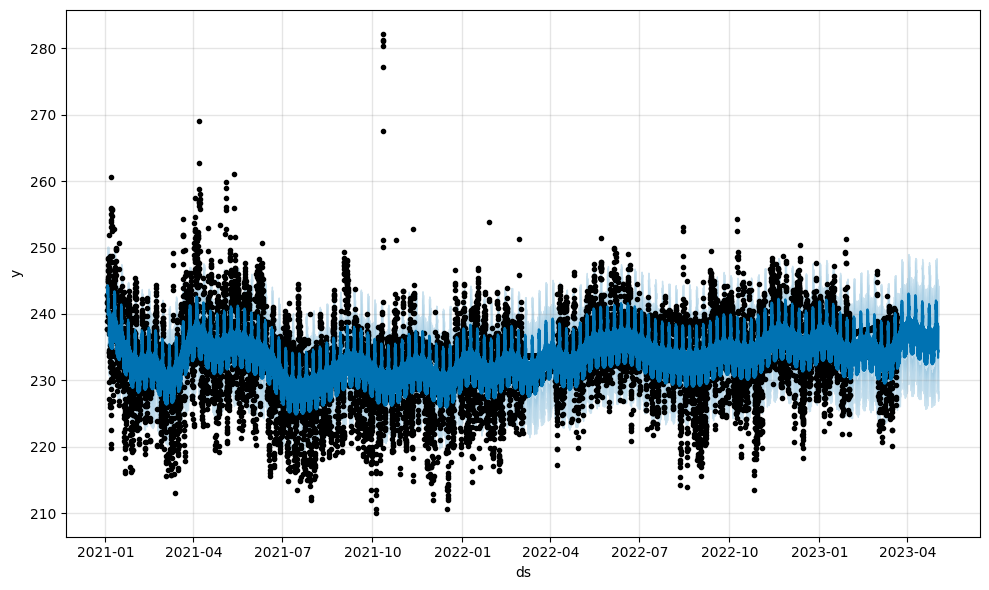

In [ ]:
fig1 = m.plot(forecast)

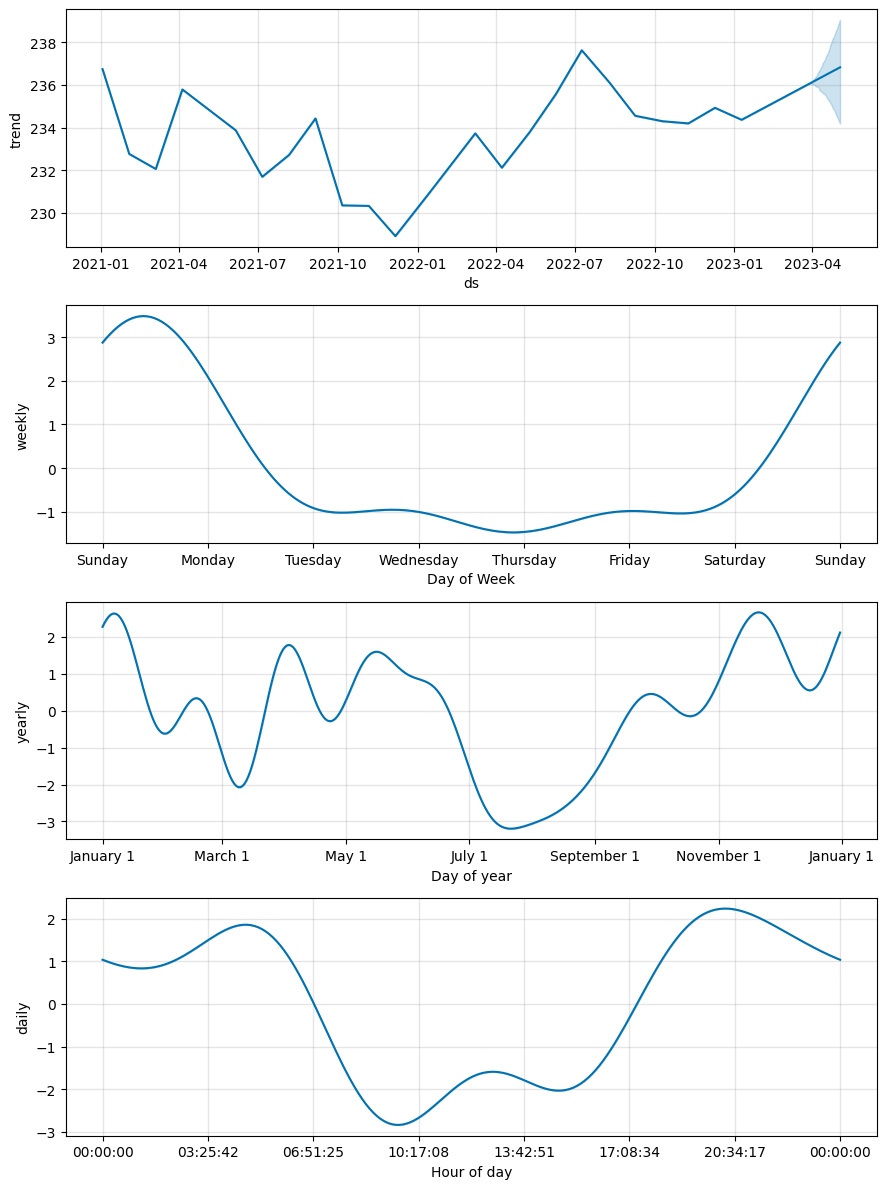

In [ ]:
comp = m.plot_components(forecast)

In [ ]:
results

y        yhat  yhat_lower  yhat_upper
ds                                                                 
2021-01-02 19:00:00  240.609217  243.150117  237.503930  249.021678
2021-01-02 20:00:00  242.816783  243.731181  238.028244  249.152530
2021-01-02 21:00:00  241.642667  243.792493  238.284319  249.886421
2021-01-02 22:00:00  242.809217  243.584820  238.417552  249.643108
2021-01-02 23:00:00  241.877150  243.318529  237.541303  249.104046
...                         ...         ...         ...         ...
2023-05-02 15:00:00  235.497283  234.227101  227.369086  240.568069
2023-05-02 16:00:00  233.516883  234.679347  228.000851  241.156264
2023-05-02 17:00:00  236.922617  235.765849  229.185340  242.074622
2023-05-02 18:00:00  236.840750  237.080361  230.257851  244.090968
2023-05-02 19:00:00  238.569286  238.093101  231.196384  244.250718

[20401 rows x 4 columns]

In [ ]:
results['error'] = results['y'] - results['yhat']
results['uncertainty'] = results['yhat_upper'] - results['yhat_lower']
results

y        yhat  yhat_lower  yhat_upper     error  \
ds                                                                              
2021-01-02 19:00:00  240.609217  243.150117  237.503930  249.021678 -2.540899   
2021-01-02 20:00:00  242.816783  243.731181  238.028244  249.152530 -0.914397   
2021-01-02 21:00:00  241.642667  243.792493  238.284319  249.886421 -2.149826   
2021-01-02 22:00:00  242.809217  243.584820  238.417552  249.643108 -0.775603   
2021-01-02 23:00:00  241.877150  243.318529  237.541303  249.104046 -1.441379   
...                         ...         ...         ...         ...       ...   
2023-05-02 15:00:00  235.497283  234.227101  227.369086  240.568069  1.270183   
2023-05-02 16:00:00  233.516883  234.679347  228.000851  241.156264 -1.162464   
2023-05-02 17:00:00  236.922617  235.765849  229.185340  242.074622  1.156768   
2023-05-02 18:00:00  236.840750  237.080361  230.257851  244.090968 -0.239611   
2023-05-02 19:00:00  238.569286  238.093101  231.196384  244.250718  0.476184   

                     uncertainty  
ds                                
2021-01-02 19:00:00    11.517748  
2021-01-02 20:00:00    11.124286  
2021-01-02 21:00:00    11.602102  
2021-01-02 22:00:00    11.225556  
2021-01-02 23:00:00    11.562742  
...                          ...  
2023-05-02 15:00:00    13.198983  
2023-05-02 16:00:00    13.155413  
2023-05-02 17:00:00    12.889282  
2023-05-02 18:00:00    13.833117  
2023-05-02 19:00:00    13.054334  

[20401 rows x 6 columns]

In [ ]:
results[results['error'].abs() > 1.5*results['uncertainty']]

y        yhat  yhat_lower  yhat_upper  \
ds                                                                    
2021-01-06 22:00:00  260.638900  239.147885  233.461336  244.987163   
2021-01-06 23:00:00  256.013667  238.743653  233.337783  244.536644   
2021-01-07 07:00:00  254.711850  237.269324  231.377529  242.638887   
2021-03-11 03:00:00  249.123700  230.614784  225.181639  236.299529   
2021-03-21 09:00:00  251.943417  234.613344  228.580398  239.887767   
2021-03-23 14:00:00  249.557733  231.770167  226.387653  237.645026   
2021-04-02 11:00:00  252.532483  233.972111  228.073522  239.376653   
2021-04-02 12:00:00  252.735717  234.519270  229.191346  240.710379   
2021-04-02 13:00:00  254.524192  234.634217  228.746271  240.874705   
2021-04-02 14:00:00  257.439767  234.380175  228.487210  240.501432   
2021-04-02 15:00:00  252.532400  234.248699  228.199721  240.198345   
2021-04-06 21:00:00  269.093467  238.468333  233.149310  244.229032   
2021-04-06 22:00:00  262.757133  238.101839  232.056233  243.539005   
2021-04-06 23:00:00  258.771000  237.681958  232.143004  242.903396   
2021-04-07 00:00:00  256.871100  237.318117  231.662532  243.111889   
2021-04-07 01:00:00  256.174467  237.102029  230.823857  242.772108   
2021-04-07 02:00:00  256.773150  237.150723  231.627063  243.145898   
2021-04-07 03:00:00  257.019267  237.492524  231.489619  243.524274   
2021-04-07 04:00:00  257.319567  237.908190  232.017972  243.659234   
2021-04-07 05:00:00  256.667550  237.957055  232.026859  243.457150   
2021-04-07 06:00:00  258.095300  237.267418  231.112103  242.902343   
2021-04-07 07:00:00  255.811550  235.883377  230.278246  241.616567   
2021-04-28 05:00:00  253.416117  235.719178  229.937432  241.299854   
2021-05-03 16:00:00  251.991150  233.554027  227.934033  239.316328   
2021-05-04 01:00:00  259.929250  235.432497  229.647478  241.098587   
2021-05-04 02:00:00  258.958500  235.485544  229.407039  241.191979   
2021-05-04 03:00:00  257.460900  235.840514  229.449935  241.900760   
2021-05-04 04:00:00  256.128017  236.277290  230.397361  241.416025   
2021-05-04 05:00:00  255.700333  236.354257  230.800536  241.926132   
2021-05-12 19:00:00  261.119217  236.463714  230.669888  242.029199   
2021-05-12 20:00:00  255.902767  236.880964  230.953010  242.672973   
2021-09-02 08:00:00  247.814667  229.694381  223.632431  235.498616   
2021-10-04 14:00:00  210.681583  228.859762  223.134596  234.653757   
2021-10-04 15:00:00  210.092367  228.585001  222.853888  234.336867   
2021-10-11 22:00:00  251.158574  231.301432  225.349979  237.113126   
2021-10-11 23:00:00  280.354350  230.849241  225.012957  236.833864   
2021-10-12 00:00:00  282.135217  230.463943  225.035774  236.249031   
2021-10-12 01:00:00  281.092167  230.236690  224.276609  236.072160   
2021-10-12 02:00:00  281.242817  230.283829  224.304610  235.852868   
2021-10-12 03:00:00  277.200600  230.632902  224.902075  236.236394   
2021-10-12 04:00:00  267.590800  231.063791  225.153238  236.748799   
2021-10-12 05:00:00  250.034684  231.134880  225.097567  236.679437   
2021-10-24 17:00:00  251.091421  232.967545  227.425391  238.707197   
2021-11-11 18:00:00  252.815883  231.938287  226.135905  237.979642   
2022-01-28 06:00:00  253.851983  231.362533  225.778425  236.896571   
2022-08-14 13:00:00  252.459879  234.925027  229.024807  240.394589   
2022-08-14 14:00:00  253.089333  234.596699  228.665377  240.575262   
2022-10-26 07:00:00  213.537183  233.052908  226.982512  238.887332   
2023-01-27 11:00:00  249.103133  231.098350  225.531768  236.329362   
2023-01-27 12:00:00  249.371450  231.636170  225.607554  237.358771   
2023-01-28 09:00:00  251.287250  232.140316  226.177021  237.366506   
2023-05-01 01:00:00  219.659683  239.764742  233.559027  246.107762   
2023-05-01 02:00:00  219.721450  239.677371  233.245402  245.871315   

                         error  uncertainty  
ds                                           
2021-01-06 22:00:00  21.491015  

In [ ]:
len(results[results['error'].abs() > 1.5*results['uncertainty']])

53

In [ ]:
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5*x['uncertainty']) else 'No', axis=1)

In [ ]:
results

y        yhat  yhat_lower  yhat_upper     error  \
ds                                                                              
2021-01-02 19:00:00  240.609217  243.150117  237.503930  249.021678 -2.540899   
2021-01-02 20:00:00  242.816783  243.731181  238.028244  249.152530 -0.914397   
2021-01-02 21:00:00  241.642667  243.792493  238.284319  249.886421 -2.149826   
2021-01-02 22:00:00  242.809217  243.584820  238.417552  249.643108 -0.775603   
2021-01-02 23:00:00  241.877150  243.318529  237.541303  249.104046 -1.441379   
...                         ...         ...         ...         ...       ...   
2023-05-02 15:00:00  235.497283  234.227101  227.369086  240.568069  1.270183   
2023-05-02 16:00:00  233.516883  234.679347  228.000851  241.156264 -1.162464   
2023-05-02 17:00:00  236.922617  235.765849  229.185340  242.074622  1.156768   
2023-05-02 18:00:00  236.840750  237.080361  230.257851  244.090968 -0.239611   
2023-05-02 19:00:00  238.569286  238.093101  231.196384  244.250718  0.476184   

                     uncertainty anomaly  
ds                                        
2021-01-02 19:00:00    11.517748      No  
2021-01-02 20:00:00    11.124286      No  
2021-01-02 21:00:00    11.602102      No  
2021-01-02 22:00:00    11.225556      No  
2021-01-02 23:00:00    11.562742      No  
...                          ...     ...  
2023-05-02 15:00:00    13.198983      No  
2023-05-02 16:00:00    13.155413      No  
2023-05-02 17:00:00    12.889282      No  
2023-05-02 18:00:00    13.833117      No  
2023-05-02 19:00:00    13.054334      No  

[20401 rows x 7 columns]

In [ ]:
import plotly.express as px

def plot_anomaly_scatter(df):
    fig = px.scatter(df.reset_index(), x='ds', y='y', color='anomaly', title='Vnavg_V')

    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=2, label="2y", step="year", stepmode="backward"),
                dict(count=3, label="3y", step="year", stepmode="backward"),
                dict(step='all')
            ])
        )
    )
    
    fig.show()


In [ ]:
fig = px.scatter(results.reset_index(), x='ds',y='y', color='anomaly', title='Vnavg_V')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector = dict(
        buttons = list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=1, label="2y", step="year", stepmode="backward"),
            dict(count=1, label="3y", step="year", stepmode="backward"),
            dict(step='all')
        ])
    )
)
fig.show()

Z-score Threshold

In [ ]:
# # Calculate the mean and standard deviation of the 'error' column
# mean_error = results['error'].mean()
# std_error = results['error'].std()

# # Calculate the z-scores
# results['z_score'] = (results['error'] - mean_error) / std_error

# # Set the threshold for outliers (e.g., z-score > 2)
# threshold = 2

# # Filter the outliers based on the z-scores
# outliers = results[results['z_score'].abs() > threshold]

# outliers





import numpy as np

results['error'] = results['y'] - results['yhat']
results['uncertainty'] = results['yhat_upper'] - results['yhat_lower']

# Calculate the Z-score for each data point
results['z_score'] = (results['error'] - results['error'].mean()) / results['error'].std()

# Set the Z-score threshold (e.g., 2.5 or 3)
z_score_threshold = 2.5

# Detect outliers based on the Z-score threshold
results['anomaly'] = np.where(results['z_score'].abs() > z_score_threshold, 'Yes', 'No')

# Print the results
results




y        yhat  yhat_lower  yhat_upper     error  \
ds                                                                              
2021-01-02 19:00:00  240.609217  243.150117  237.503930  249.021678 -2.540899   
2021-01-02 20:00:00  242.816783  243.731181  238.028244  249.152530 -0.914397   
2021-01-02 21:00:00  241.642667  243.792493  238.284319  249.886421 -2.149826   
2021-01-02 22:00:00  242.809217  243.584820  238.417552  249.643108 -0.775603   
2021-01-02 23:00:00  241.877150  243.318529  237.541303  249.104046 -1.441379   
...                         ...         ...         ...         ...       ...   
2023-05-02 15:00:00  235.497283  234.227101  227.369086  240.568069  1.270183   
2023-05-02 16:00:00  233.516883  234.679347  228.000851  241.156264 -1.162464   
2023-05-02 17:00:00  236.922617  235.765849  229.185340  242.074622  1.156768   
2023-05-02 18:00:00  236.840750  237.080361  230.257851  244.090968 -0.239611   
2023-05-02 19:00:00  238.569286  238.093101  231.196384  244.250718  0.476184   

                     uncertainty anomaly   z_score  
ds                                                  
2021-01-02 19:00:00    11.517748      No -0.545181  
2021-01-02 20:00:00    11.124286      No -0.188048  
2021-01-02 21:00:00    11.602102      No -0.459312  
2021-01-02 22:00:00    11.225556      No -0.157573  
2021-01-02 23:00:00    11.562742      No -0.303758  
...                          ...     ...       ...  
2023-05-02 15:00:00    13.198983      No  0.291623  
2023-05-02 16:00:00    13.155413      No -0.242516  
2023-05-02 17:00:00    12.889282      No  0.266720  
2023-05-02 18:00:00    13.833117      No -0.039884  
2023-05-02 19:00:00    13.054334      No  0.117284  

[20401 rows x 8 columns]

In [ ]:
plot_anomaly_scatter(results)

Modified Z-Score

In [ ]:
# from scipy.stats import median_absolute_deviation

# # Calculate the median and median absolute deviation (MAD) of the 'error' column
# median_error = results['error'].median()
# mad_error = median_absolute_deviation(results['error'])

# # Calculate the modified z-scores
# results['modified_z_score'] = 0.6745 * (results['error'] - median_error) / mad_error

# # Set the threshold for outliers (e.g., modified z-score > 3.5)
# threshold = 3.5

# # Filter the outliers based on the modified z-scores
# outliers = results[results['modified_z_score'].abs() > threshold]

# # Display the outliers
# print(outliers)



import numpy as np

results['error'] = results['y'] - results['yhat']
results['uncertainty'] = results['yhat_upper'] - results['yhat_lower']

# Calculate the Median Absolute Deviation (MAD)
median_abs_deviation = np.median(np.abs(results['error'] - results['error'].median()))

# Calculate the Modified Z-Score for each data point
results['modified_z_score'] = 0.6745 * (results['error'] - results['error'].median()) / median_abs_deviation

# Set the Modified Z-Score threshold (e.g., 3 or 3.5)
modified_z_score_threshold = 3

# Detect outliers based on the Modified Z-Score threshold
results['anomaly'] = np.where(results['modified_z_score'].abs() > modified_z_score_threshold, 'Yes', 'No')

len(results[results['anomaly']=='Yes'])


321

In [ ]:
plot_anomaly_scatter(results)

Tukey's fences

In [ ]:
# # Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) of the 'error' column
# Q1 = results['error'].quantile(0.25)
# Q3 = results['error'].quantile(0.75)
# IQR = Q3 - Q1

# # Set the parameter for Tukey's fences (e.g., k = 1.5)
# k = 1.5

# # Calculate the lower and upper fences
# lower_fence = Q1 - k * IQR
# upper_fence = Q3 + k * IQR

# # Filter the outliers based on the fences
# outliers = results[(results['error'] < lower_fence) | (results['error'] > upper_fence)]

# # Display the outliers
# print(outliers)


import numpy as np

results['error'] = results['y'] - results['yhat']
results['uncertainty'] = results['yhat_upper'] - results['yhat_lower']

# Calculate the interquartile range (IQR)
Q1 = results['error'].quantile(0.25)
Q3 = results['error'].quantile(0.75)
IQR = Q3 - Q1

# Set the Tukey's fence threshold (e.g., 1.5)
tukey_fence_threshold = 1.5

# Define the lower and upper fences
lower_fence = Q1 - tukey_fence_threshold * IQR
upper_fence = Q3 + tukey_fence_threshold * IQR

# Detect outliers based on Tukey's fences
results['anomaly'] = np.where((results['error'] < lower_fence) | (results['error'] > upper_fence), 'Yes', 'No')

len(results[results['anomaly']=='Yes'])



508

In [ ]:
plot_anomaly_scatter(results)

Outlier detection algorithms

1. Isolation Forest

In [ ]:
# from sklearn.ensemble import IsolationForest

# # Create the Isolation Forest model
# model = IsolationForest(contamination=0.05)  # Set the contamination parameter to the expected outlier proportion

# # Fit the model on the 'error' column
# model.fit(results[['error']])

# # Predict the outliers
# outliers = model.predict(results[['error']])

# # Filter the rows where outliers are detected
# outliers_df = results[outliers == -1]

# # Display the outliers
# print(outliers_df)



from sklearn.ensemble import IsolationForest

results['error'] = results['y'] - results['yhat']
results['uncertainty'] = results['yhat_upper'] - results['yhat_lower']

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed

# Fit the model to the error values
model.fit(results[['error']])

# Predict the outliers
results['anomaly'] = np.where(model.predict(results[['error']]) == -1, 'Yes', 'No')

len(results[results['anomaly']=='Yes'])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



1020

In [ ]:
plot_anomaly_scatter(results)

2. One-Class SVM

In [ ]:
# from sklearn.svm import OneClassSVM

# # Create the One-Class SVM model
# model = OneClassSVM(nu=0.05)  # Set the 'nu' parameter to the expected outlier proportion

# # Fit the model on the 'error' column
# model.fit(results[['error']])

# # Predict the outliers
# outliers = model.predict(results[['error']])

# # Filter the rows where outliers are detected
# outliers_df = results[outliers == -1]


from sklearn.svm import OneClassSVM

results['error'] = results['y'] - results['yhat']
results['uncertainty'] = results['yhat_upper'] - results['yhat_lower']

# Create a One-Class SVM model
model = OneClassSVM(nu=0.05)  # Adjust the nu parameter as needed

# Fit the model to the error values
model.fit(results[['error']])

# Predict the outliers
results['anomaly'] = np.where(model.predict(results[['error']]) == -1, 'Yes', 'No')
print(len(results[results['anomaly']=='Yes']))


plot_anomaly_scatter(results)

1454


3.  Local Outlier Factor (LOF)

In [ ]:
# from sklearn.neighbors import LocalOutlierFactor

# # Create the LOF model
# model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Set the number of neighbors and contamination

# # Fit the model on the 'error' column
# model.fit(results[['error']])

# # Compute the outlier scores
# scores = model.negative_outlier_factor_

# # Predict the outliers
# outliers = model.predict(results[['error']])

# # Filter the rows where outliers are detected
# outliers_df = results[outliers == -1]

# # Display the outliers
# print(outliers_df)


from sklearn.neighbors import LocalOutlierFactor

results['error'] = results['y'] - results['yhat']
results['uncertainty'] = results['yhat_upper'] - results['yhat_lower']

# Create a Local Outlier Factor model
model = LocalOutlierFactor(contamination=0.05, novelty=False)  # Adjust the contamination parameter as needed

# Fit the model to the error values and predict outliers
results['anomaly1'] = model.fit_predict(results[['error']])
results['anomaly'] = np.where(results['anomaly1'] == -1, 'Yes', 'No')

# Print the results
print(results)


print(len(results[results['anomaly']=='Yes']))

plot_anomaly_scatter(results)

                              y        yhat  yhat_lower  yhat_upper     error  \
ds                                                                              
2021-01-02 19:00:00  240.609217  243.150117  237.503930  249.021678 -2.540899   
2021-01-02 20:00:00  242.816783  243.731181  238.028244  249.152530 -0.914397   
2021-01-02 21:00:00  241.642667  243.792493  238.284319  249.886421 -2.149826   
2021-01-02 22:00:00  242.809217  243.584820  238.417552  249.643108 -0.775603   
2021-01-02 23:00:00  241.877150  243.318529  237.541303  249.104046 -1.441379   
...                         ...         ...         ...         ...       ...   
2023-05-02 15:00:00  235.497283  234.227101  227.369086  240.568069  1.270183   
2023-05-02 16:00:00  233.516883  234.679347  228.000851  241.156264 -1.162464   
2023-05-02 17:00:00  236.922617  235.765849  229.185340  242.074622  1.156768   
2023-05-02 18:00:00  236.840750  237.080361  230.257851  244.090968 -0.239611   
2023-05-02 19:00:00  238.569